In [1]:
!pip install fastai -U
!pip install timm

In [2]:
from fastai.vision.all import *
import timm
import torch

/home/dnth/anaconda3/envs/fastdupv1/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Import the necessary libraries
from fastai.vision.all import *

# Define the paths to the train and validation directories
path = Path('data')

# Load the data using the fastai library
dls = ImageDataLoaders.from_folder(path=path, train='train_set', valid='valid_set', 
                                   batch_tfms=aug_transforms(mult=1.5, size=150, min_scale=0.75),
                                   item_tfms=Resize(224), bs=32)


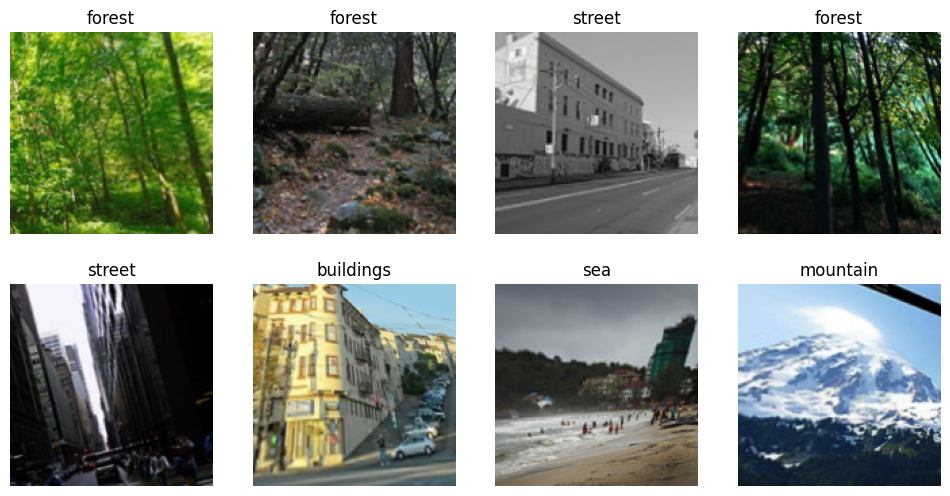

In [4]:
dls.train.show_batch(max_n=8, nrows=2)

In [6]:
learn = vision_learner(dls, 'convnext_tiny_in22k', metrics=accuracy).to_fp16()

SuggestedLRs(valley=0.0012022644514217973)

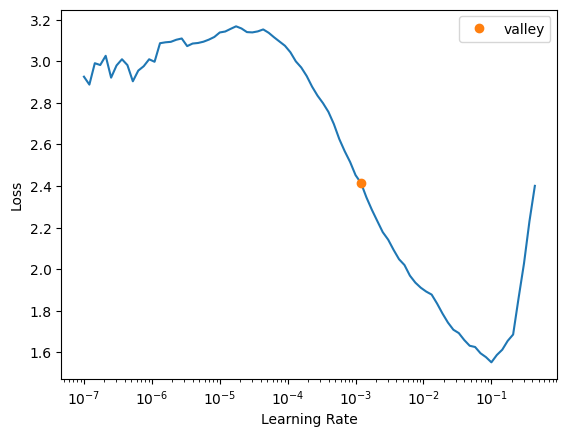

In [7]:
learn.lr_find()

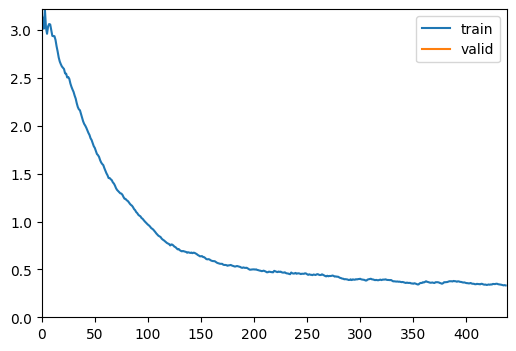

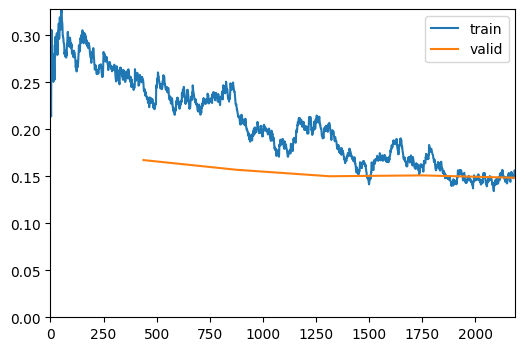

In [8]:
learn.fine_tune(5, base_lr=1e-3, cbs=[ShowGraphCallback()])

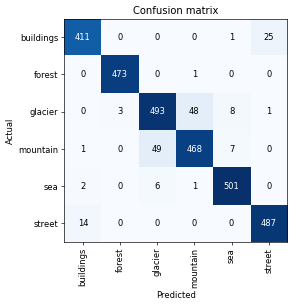

In [9]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(5,5), dpi=60)

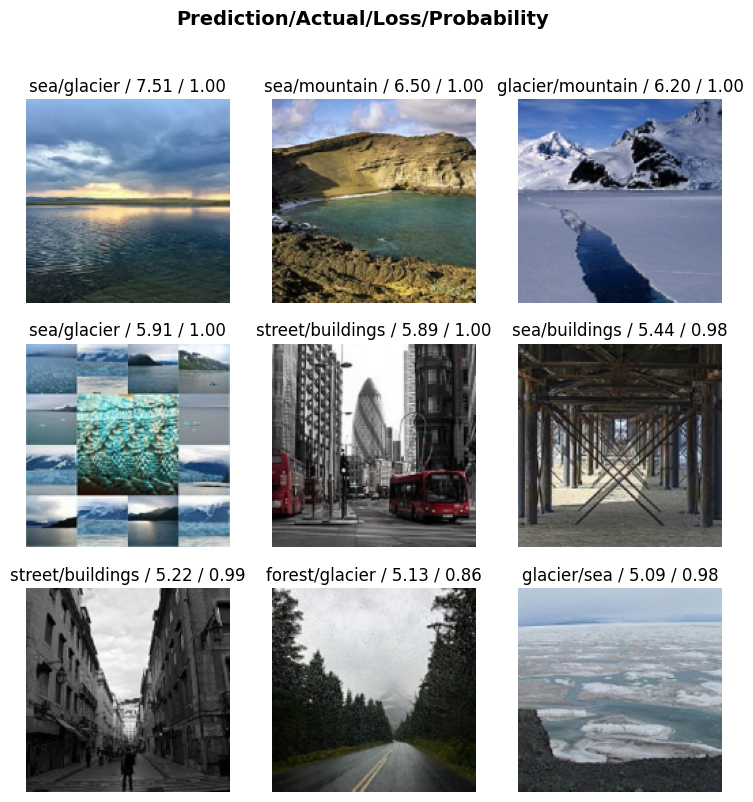

In [10]:
interp.plot_top_losses(9)

In [11]:
interp.most_confused

<bound method ClassificationInterpretation.most_confused of <fastai.interpret.ClassificationInterpretation object at 0x7efb5816b1c0>>

mountain   98.51% confidence.   Image = 24272.jpg
mountain   97.10% confidence.   Image = 18698.jpg
forest   100.00% confidence.   Image = 19414.jpg
glacier   99.98% confidence.   Image = 18376.jpg
buildings   99.99% confidence.   Image = 5987.jpg
glacier   89.14% confidence.   Image = 3418.jpg
glacier   99.96% confidence.   Image = 22332.jpg
glacier   99.94% confidence.   Image = 4245.jpg
mountain   91.45% confidence.   Image = 494.jpg
mountain   99.78% confidence.   Image = 9945.jpg
buildings   80.78% confidence.   Image = 16475.jpg
forest   100.00% confidence.   Image = 7472.jpg
sea   100.00% confidence.   Image = 1349.jpg
street   99.53% confidence.   Image = 1109.jpg
forest   99.98% confidence.   Image = 11996.jpg
street   99.93% confidence.   Image = 6696.jpg
street   98.68% confidence.   Image = 21251.jpg
street   98.90% confidence.   Image = 12291.jpg
street   99.91% confidence.   Image = 21642.jpg
buildings   98.17% confidence.   Image = 6995.jpg


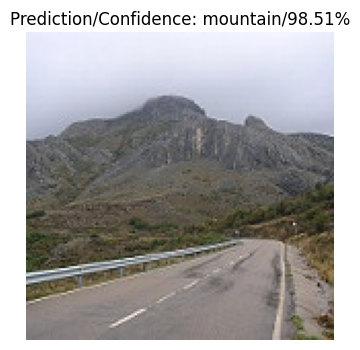

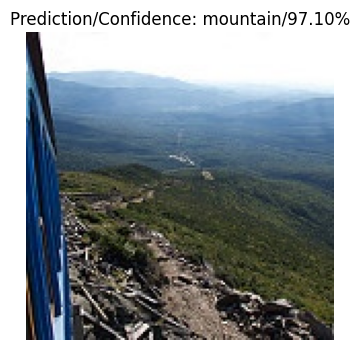

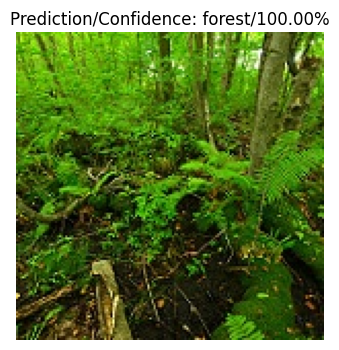

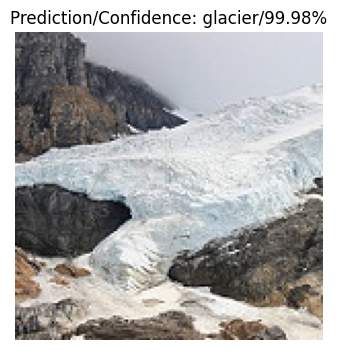

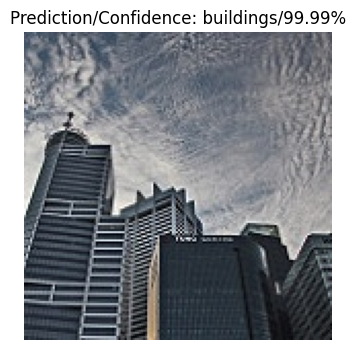

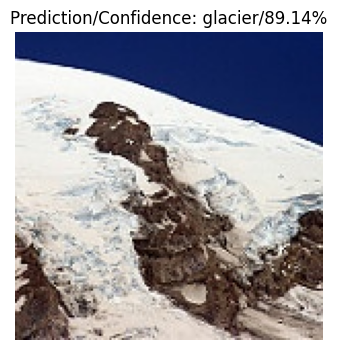

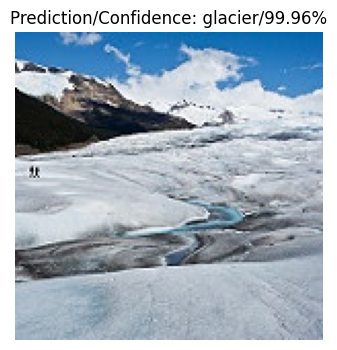

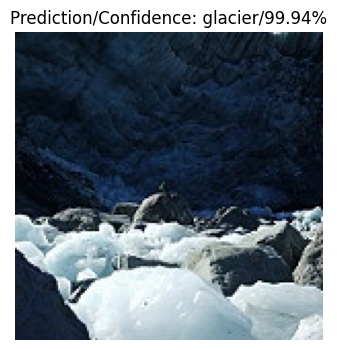

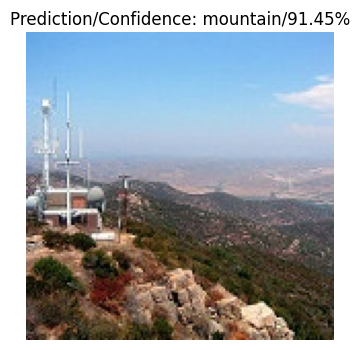

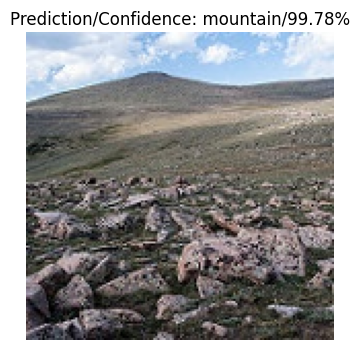

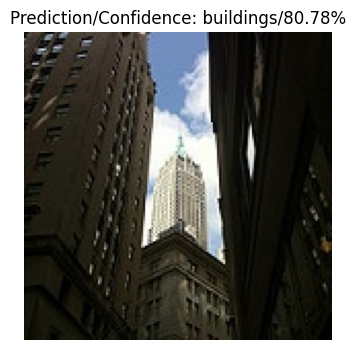

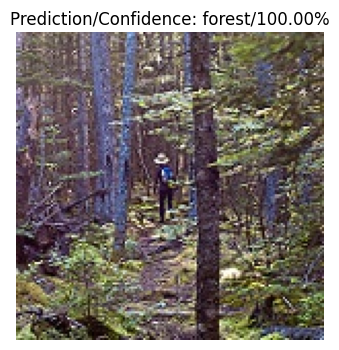

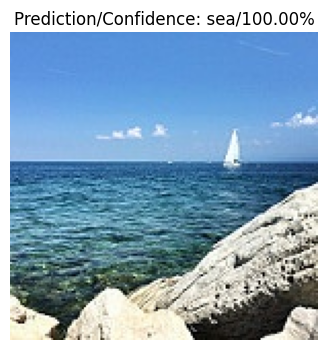

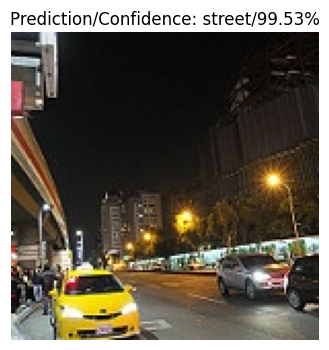

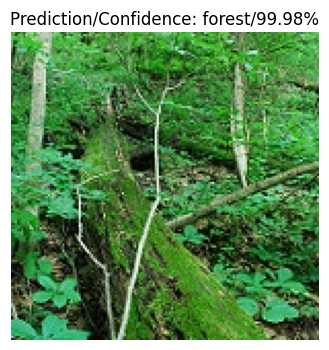

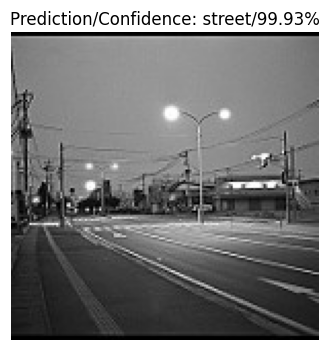

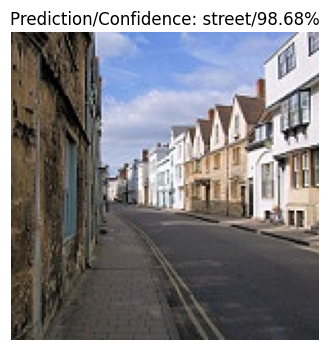

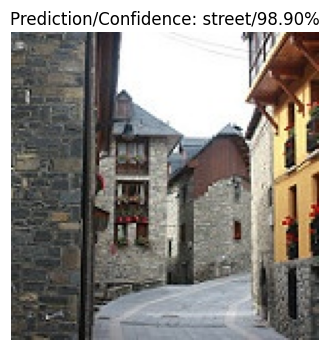

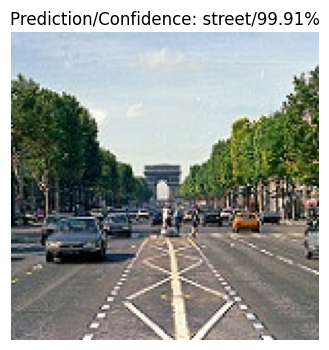

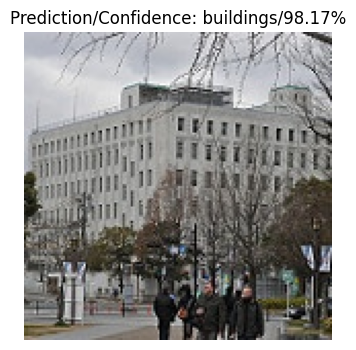

In [12]:
test_dl = learn.dls.test_dl(get_image_files('data/test_set/'))
preds = learn.get_preds(dl=test_dl)
num_images_to_show = 20
for index,item in enumerate(preds[0]):
    if index == num_images_to_show:
        break
    prediction = learn.dls.categorize.decode(np.argmax(item))
    confidence = max(item)
    percent = float(confidence)
    print(f"{prediction}   {percent*100:.2f}% confidence.   Image = {test_dl.items[index].name}")
    im = PILImage.create(test_dl.items[index])
    im.thumbnail((150,150))
    im.show(title=f'Prediction/Confidence: {prediction}/{percent*100:.2f}%')

    

In [13]:
learn.export("./models/learner.pkl")